# bp demo

In [1]:
"""
Create by yj on 2019/2/26
"""

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 1. 读取数据
df = pd.read_csv('traffic_data.csv', encoding='utf-8')
print(df.head())

# 2. 读取特征属性X
x = df[['人口数', '机动车数', '公路面积']]
y = df[['客运量', '货运量']]

     人口数  机动车数  公路面积      客运量     货运量
0  20.55  0.60  0.09   5126.0  1237.0
1  22.44  0.75  0.11   6217.0  1379.0
2  25.37  0.85  0.11   7730.0  1385.0
3  27.13  0.90  0.14   9145.0  1399.0
4  29.45  1.05  0.20  10460.0  1663.0


In [3]:
# 3. 因为x和y的数据取值范围太大了，所以做一个归一化操作(使用区间缩放法)
x_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

# 为了后面和w进行矩阵的乘法操作
sample_in = x.T
sample_out = y.T

In [4]:
# 超参数
max_epochs = 60000
learn_rate = 0.035
mse_final = 6.5e-4
sample_number = x.shape[0]
input_number = 3
out_number = 2
hidden_unit_number = 8

In [5]:
# 网络参数
# 8*3的矩阵
w1 = 0.5 * np.random.rand(hidden_unit_number, input_number) - 0.1
# 8*1的矩阵
b1 = 0.5 * np.random.rand(hidden_unit_number, 1) - 0.1
# 2*8的矩阵
w2 = 0.5 * np.random.rand(out_number, hidden_unit_number) - 0.1
# 2*1的矩阵
b2 = 0.5 * np.random.rand(out_number, 1) - 0.1


def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


mse_history = []

In [6]:
# BP的计算
for i in range(max_epochs):
    # FP过程
    # 隐藏层的输出
    hidden_out = sigmoid(np.dot(w1, sample_in).transpose() + b1.transpose()).transpose()
    # 输出层的输出（为了简化我们的写法，输出层不进行sigmoid激活）
    netword_out = (np.dot(w2, hidden_out).transpose() + b2.transpose()).transpose()

    # 错误
    err = sample_out - netword_out
    mse = np.average(np.square(err))
    mse_history.append(mse)
    if mse < mse_final:
        break

    # BP过程
    delta2 = -err
    delta1 = np.dot(w2.transpose(), delta2) * hidden_out * (1 - hidden_out)
    dw2 = np.dot(delta2, hidden_out.transpose())
    db2 = np.dot(delta2, np.ones((sample_number, 1)))
    dw1 = np.dot(delta1, sample_in.transpose())
    db1 = np.dot(delta1, np.ones((sample_number, 1)))
    w2 -= learn_rate * dw2
    b2 -= learn_rate * db2
    w1 -= learn_rate * dw1
    b1 -= learn_rate * db1


/Users/yj/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


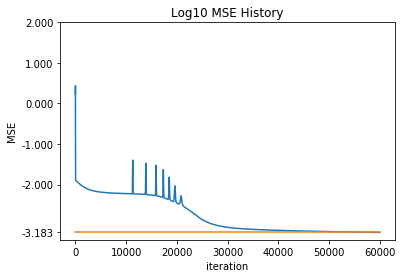

In [7]:
# 误差曲线图
mse_history10 = np.log10(mse_history)
min_mse = min(mse_history10)
plt.plot(mse_history10)
plt.plot([0, len(mse_history10)], [min_mse, min_mse])
ax = plt.gca()
ax.set_yticks([-2, -1, 0, 1, 2, min_mse])
ax.set_xlabel('iteration')
ax.set_ylabel('MSE')
ax.set_title('Log10 MSE History')
plt.show()

/Users/yj/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


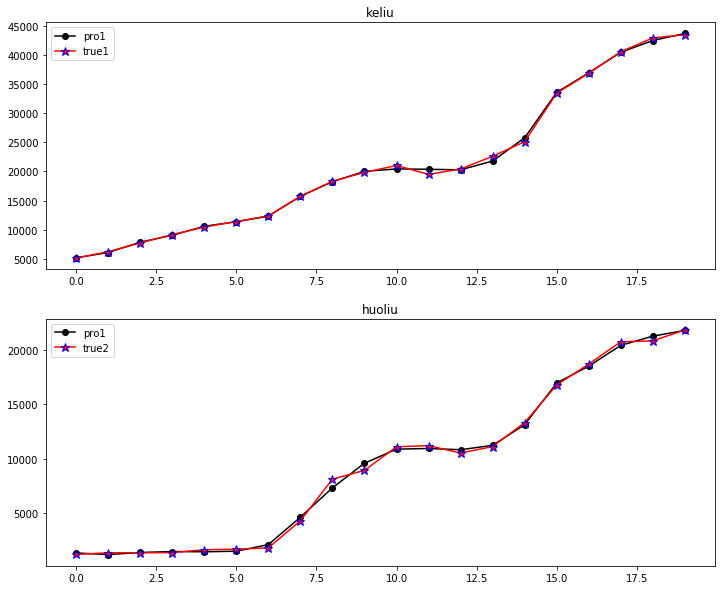

In [9]:
# 仿真输出和实际输出对比图
# 隐藏层输出
hidden_out = sigmoid((np.dot(w1, sample_in).transpose() + b1.transpose())).transpose()
# 输出层输出
network_out = (np.dot(w2, hidden_out).transpose() + b2.transpose()).transpose()
# 反转获取实际值
network_out = y_scaler.inverse_transform(network_out.T)
sample_out = y_scaler.inverse_transform(y)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
line1, = axes[0].plot(network_out[:, 0], 'k', marker='o')
line2, = axes[0].plot(sample_out[:, 0], 'r', markeredgecolor='b', marker='*', markersize=9)
axes[0].legend((line1, line2), ('pro1', 'true1'), loc='upper left')
axes[0].set_title('keliu')
line3, = axes[1].plot(network_out[:, 1], 'k', marker='o')
line4, = axes[1].plot(sample_out[:, 1], 'r', markeredgecolor='b', marker='*', markersize=9)
axes[1].legend((line3, line4), ('pro1', 'true2'), loc='upper left')
axes[1].set_title('huoliu')
plt.show()
